<a href="https://colab.research.google.com/github/jittakorn-ch/DWDM21/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and Preprocessing
- present วันที่ 31 สิงหาคม 2564
- ข้อมูลที่ไปดึงมาจาก 3 แหล่ง
- แสดงวิธีการโหลด
- ความเชื่อมโยงของ 3 ตาราง (index)

ที่มาของข้อมูล : https://www.kaggle.com/olistbr/brazilian-ecommerce

เป็นข้อมูลของบริษัท Olist เป็นบริษัทขายสินค้าของประเทศบราซิล (คล้ายๆ lazada)


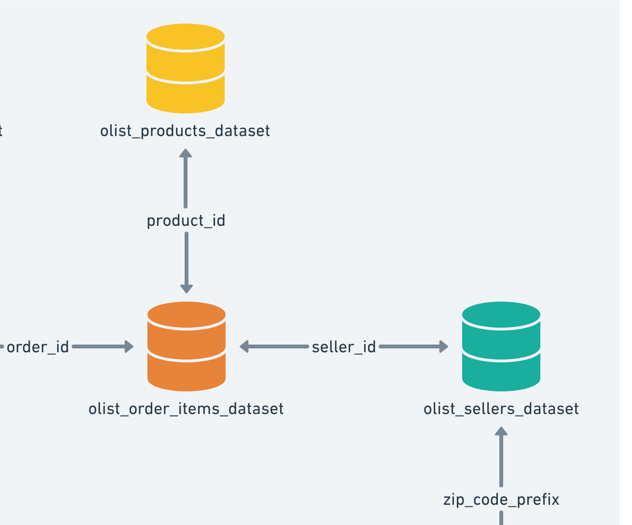

In [1]:
import pandas as pd               ### สำหรับข้อมูลลักษณะ ตาราง

In [2]:
from google.colab import drive   ### เชื่อมต่อ drive
drive.mount('/content/drive')    ### คลิกลิ้ง -> เลือก E-mail -> ลงชื่อ -> ก็อปโค้ด -> นำกลับมาวาง -> enter

Mounted at /content/drive


In [3]:
import os                      ### จัดการไฟล์และ path

In [4]:
path = '/content/drive/My Drive/DWDM2021_DATA'

## ตาราง sellers

เป็นตารางที่เกี่ยวกับผู้ขายสินค้า ที่ขายสินค้าใน Olist

In [5]:
sellers = pd.read_csv(os.path.join(path,'olist_sellers_dataset.csv'))
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**seller_id** คือ PK ของตาราง

**seller_zip_code_prefix** คือ FK (รหัสไปษณีย์ 5 หลักแรกของผู้ขาย) 

**seller_city** คือ ชื่อเมืองผู้ขาย

**seller_state** คือ ชื่อรัฐผู้ขาย  

In [6]:
### ดูว่าแต่ละ column มีค่า missing มั้ย

sellers.isnull().any()

seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool

## ตาราง order_items

ข้อมูลเกี่ยวกับสินค้าที่ซื้อในแต่ละคำสั่งซื้อ

In [7]:
order_items = pd.read_csv(os.path.join(path,'olist_order_items_dataset.csv'))
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**order_id** คือ PK

**order_item_id** คือ หมายเลขลำดับระบุจำนวนรายการที่รวมอยู่ในลำดับเดียวกัน

**product_id** คือ FK (เป็น PK ของตาราง products)

**seller_id** คือ FK (เป็น PK ของตาราง sellers)

**shipping_limit_date** คือ กำหนดการ deadline วันส่งสินค้าของผู้ขายให้กับบริษัทขนส่ง

**price** คือ ราคาสินค้า

**freight_value** คือ ค่าจัดส่ง

In [8]:
### ดูว่าแต่ละ column มีค่า missing มั้ย

order_items.isnull().any()

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

## ตาราง products

ข้อมูลเกี่ยวกับผลิตภัณฑ์ที่ขายใน Olist

In [9]:
products = pd.read_csv(os.path.join(path,'olist_products_dataset.csv'))
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**product_id** คือ PK

**product_category_name** คือ ชื่อหมวดหมู่สินค้า (ภาษาโปรตุเกส)

**product_name_lenght** คือ จำนวนอักษรของชื่อสินค้า

**product_description_lenght** คือ จำนวนอักษรของคำอธิบายสินค้า

**product_photos_qty** คือ จำนวนรูปภาพที่เผยแพร่ของสินค้า

**product_weight_g** คือ น้ำหนักของสินค้า (g)

**product_length_cm** คือ ความยาวของสินค้า (cm)

**product_height_cm** คือ ความสูงของสินค้า (cm)

**product_width_cm** คือ ความกว้างของสินค้า (cm)


In [10]:
products.isnull().any()

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [11]:
### function หา % ของข้อมูลที่จะหายไปถ้า .dropna()

def loss_data(data):
    im = data.shape[0]
    jm = data.dropna().shape[0]
    km = im - jm
    print(f'size before drop = {im}')
    print(f'size after drop = {jm}')
    print(f'we loss {km*100/im} % of data')

In [12]:
loss_data(products)

size before drop = 32951
size after drop = 32340
we loss 1.8542684592273375 % of data


In [13]:
products_dropped = products.dropna()
products_dropped

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## ต่อตาราง

In [14]:
### ต่อตาราง order_items กับ sellers

merged_ori_sellers = order_items.merge(sellers,how='left',left_on='seller_id',right_on='seller_id')
merged_ori_sellers

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP


In [15]:
### ต่อตาราง order_items, sellers, products

merged_ori_sellers_pro = merged_ori_sellers.merge(products_dropped,how='left',left_on='product_id',right_on='product_id')
merged_ori_sellers_pro

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [16]:
### ดูว่าแต่ละ column มีค่า missing มั้ย

merged_ori_sellers_pro.isnull().any()

order_id                      False
order_item_id                 False
product_id                    False
seller_id                     False
shipping_limit_date           False
price                         False
freight_value                 False
seller_zip_code_prefix        False
seller_city                   False
seller_state                  False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [17]:
#เสียข้อมูลเยอะแค่ไหนถ้า .dropna()
loss_data(merged_ori_sellers_pro)

size before drop = 112650
size after drop = 111046
we loss 1.4238792720816689 % of data


In [18]:
#ลบ mising ด้วยการ .dropna()
data_droped = merged_ori_sellers_pro.dropna()
data_droped

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [19]:
### ดูว่าแต่ละ column มีค่า missing มั้ย

data_droped.isnull().any()

order_id                      False
order_item_id                 False
product_id                    False
seller_id                     False
shipping_limit_date           False
price                         False
freight_value                 False
seller_zip_code_prefix        False
seller_city                   False
seller_state                  False
product_category_name         False
product_name_lenght           False
product_description_lenght    False
product_photos_qty            False
product_weight_g              False
product_length_cm             False
product_height_cm             False
product_width_cm              False
dtype: bool

# ปัญหา

## Association Rules

In [20]:
#install apyori
!pip install apyori
#implot package apriori จาก apyori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=f29cc707438b4005e441f19f12eaa98d91791d7e53fa605cb5330dee08a0512b
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [21]:
#จัดกลุ่ม product_id ด้วย order_id
transactions = data_droped.groupby('order_id')['product_id'].apply(list)
transactions

order_id
00010242fe8c5a6d1ba2dd792cb16214    [4244733e06e7ecb4970a6e2683c13e61]
00018f77f2f0320c557190d7a144bdd3    [e5f2d52b802189ee658865ca93d83a8f]
000229ec398224ef6ca0657da4fc703e    [c777355d18b72b67abbeef9df44fd0fd]
00024acbcdf0a6daa1e931b038114c75    [7634da152a4610f1595efa32f14722fc]
00042b26cf59d7ce69dfabb4e55b4fd9    [ac6c3623068f30de03045865e4e10089]
                                                   ...                
fffc94f6ce00a00581880bf54a75a037    [4aa6014eceb682077f9dc4bffebc05b0]
fffcd46ef2263f404302a634eb57f7eb    [32e07fd915822b0765e448c4dd74c828]
fffce4705a9662cd70adb13d4a31832d    [72a30483855e2eafc67aee5dc2560482]
fffe18544ffabc95dfada21779c9644f    [9c422a519119dcad7575db5af1ba540e]
fffe41c64501cc87c801fd61db3f6244    [350688d9dc1e75ff97be326363655e01]
Name: product_id, Length: 97276, dtype: object

In [22]:
#หา association rules โดยกำหนด min_support เท่ากับ 0.5 %
frequentItemsets = list(apriori(transactions,min_support = 0.005))
frequentItemsets

[]

**สรุปการทำ Association Rules** ด้วยการจัดกลุ่ม product_id ด้วย order_id สรุปได้ว่า ไม่มีอะไรน่าสนใจ เนื่องจากไม่มี product_id ที่มี min_support เกิน 0.5% เลย 

## Classification



ทำนาย **product_category_name**(ชื่อหมวดหมู่สินค้า) ด้วย


**price**(ราคาสินค้า)

**freight_value**(ค่าจัดส่ง)

**product_weight_g**(น้ำหนักของสินค้า (g))

**product_length_cm**(ความยาวของสินค้า (cm))

**product_height_cm**(ความสูงของสินค้า (cm))

**product_width_cm**(ความกว้างของสินค้า (cm))

### Split Data

In [23]:
#ดูชื่อคอลัมน์ทั้งหมด
set(data_droped.columns)

{'freight_value',
 'order_id',
 'order_item_id',
 'price',
 'product_category_name',
 'product_description_lenght',
 'product_height_cm',
 'product_id',
 'product_length_cm',
 'product_name_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_width_cm',
 'seller_city',
 'seller_id',
 'seller_state',
 'seller_zip_code_prefix',
 'shipping_limit_date'}

In [24]:
#กำหนด X และ y
X = data_droped[['product_height_cm','product_length_cm','product_weight_g','product_width_cm','freight_value','price']]
y = data_droped['product_category_name']

In [25]:
from sklearn.model_selection import  train_test_split


Train-Test

In [26]:
#แบ่งข้อมูลออกเป็น 2 ส่วน ด้วยการสุ่ม
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

In [27]:
X.shape

(111046, 6)

In [28]:
X_train.shape

(55523, 6)

In [29]:
X_test.shape

(55523, 6)

Train - Validation

In [30]:
#แบ่งข้อมูลจาก X_train,y_train ออกเป็น 2 ส่วน ด้วยการสุ่ม
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=13)

### Decision Tree

In [31]:
#import
from sklearn.tree import DecisionTreeClassifier

In [32]:
#import accuracy_score จาก sklearn.metrics
from sklearn.metrics import accuracy_score

ใช้ค่า default

In [33]:
#define
mytree = DecisionTreeClassifier()
#train
mytree.fit(X_train2,y_train2)
#test
mytree_result = mytree.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result)

0.7630425646875187

ใช้เกณฑ์ criterion='entropy', splitter='random', random_state=13

In [34]:
#define
mytree2 = DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=13)
#train
mytree2.fit(X_train2,y_train2)
#test
mytree_result2 = mytree2.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result2)

0.7715074743351144

ใช้เกณฑ์ splitter='random',random_state=13

In [35]:
#define
mytree3 = DecisionTreeClassifier(splitter='random',random_state=13)
#train
mytree3.fit(X_train2,y_train2)
#test
mytree_result3 = mytree3.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result3)

0.77576994656901

ใช้เกณฑ์ min_samples_leaf=2,splitter='random',random_state=13

In [36]:
#define
mytree4 = DecisionTreeClassifier(min_samples_leaf=2,splitter='random',random_state=13)
#train
mytree4.fit(X_train2,y_train2)
#test
mytree_result4 = mytree4.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result4)

0.7161553701146665

#### Retrain & Evaluate

In [37]:
#import
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
#Define
mytree3_final = DecisionTreeClassifier(splitter='random',random_state=13)
#Train
mytree3_final.fit(X_train,y_train)
#Predict
mytree3_final_result = mytree3_final.predict(X_test)

In [54]:
#Evaluate
acc_decision_tree = accuracy_score(y_test, mytree3_final_result)
acc_decision_tree

0.8109252021684707

In [40]:
#หา Confusion Matrix
confusion_matrix(y_test, mytree3_final_result)

array([[  64,    1,    0, ...,    0,    0,    6],
       [   1,  208,    1, ...,    0,    0,    1],
       [   0,    1,   95, ...,    0,    0,    7],
       ...,
       [   0,    0,    0, ..., 2057,    4,   13],
       [   0,    0,    0, ...,   14,   83,    2],
       [   4,    7,    5, ...,    7,    2, 2619]])

In [41]:
#ดูตารางที่ได้จาก confusion matrix
con_mat_tree = classification_report(y_test, mytree3_final_result)
print(con_mat_tree)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                precision    recall  f1-score   support

                     agro_industria_e_comercio       0.74      0.63      0.68       102
                                     alimentos       0.75      0.86      0.80       242
                             alimentos_bebidas       0.78      0.68      0.73       140
                                         artes       0.88      0.79      0.83       116
                            artes_e_artesanato       0.14      0.14      0.14         7
                             artigos_de_festas       0.55      0.48      0.51        23
                              artigos_de_natal       0.57      0.74      0.64        65
                                         audio       0.75      0.86      0.80       187
                                    automotivo       0.74      0.71      0.72      2122
                                         bebes       0.77      0.77      0.77      1542
                               

### KNN

In [42]:
#import
from sklearn.neighbors import KNeighborsClassifier

ใช้เกณฑ์ n_neighbors=3, weights='uniform'

In [43]:
# Define
neigh1 = KNeighborsClassifier(n_neighbors=3, weights='uniform') #ถามเพื่อนบ้านที่ใกล้สุด 3 คน และเชื่อทุกๆคนเท่ากัน
# Train
neigh1.fit(X_train2,y_train2)
# Test
knn1_result = neigh1.predict(X_val)
#accuracy_score
accuracy_score(y_val, knn1_result)

0.6378099297592603

ใช้เกณฑ์ n_neighbors=25, weights='distance'

In [44]:
# Define
neigh2 = KNeighborsClassifier(n_neighbors=25, weights='distance') #ถามเพื่อนบ้านที่ใกล้สุด 25 คน และเชื่อคนที่อยู่ใกล้มากกว่าไกล
# Train
neigh2.fit(X_train2,y_train2)
# Test
knn2_result = neigh2.predict(X_val)
#accuracy_score
accuracy_score(y_val, knn2_result)

0.6530587740889716

ใช้เกณฑ์ n_neighbors=1

In [45]:
# Define
neigh3 = KNeighborsClassifier(n_neighbors=1) #เชื่อเพื่อนบ้านที่ใกล้ที่สุดคนเดียว
# Train
neigh3.fit(X_train2,y_train2)
# Test
knn3_result = neigh3.predict(X_val)
#accuracy_score
accuracy_score(y_val, knn3_result)

0.7111124452182266

#### Retrain & Evaluate

In [46]:
#Define
neigh3_final = KNeighborsClassifier(n_neighbors=1)
#Train
neigh3_final.fit(X_train,y_train)
#predict
knn3_final_result = neigh3_final.predict(X_test)

In [55]:
#Evaluate
acc_KNN = accuracy_score(y_test, knn3_final_result)
acc_KNN

0.7477081569799903

### Neural Network

In [48]:
#import
from sklearn.neural_network import MLPClassifier

ann1

In [49]:
#define
perceptron1 = MLPClassifier(random_state=13, max_iter=200, hidden_layer_sizes=1,learning_rate_init=0.005)
#train
perceptron1.fit(X_train2,y_train2)
#test
ann1_result = perceptron1.predict(X_val)
#accuracy_score
accuracy_score(y_val, ann1_result)

0.16545596445938646

ann2

In [50]:
#define
perceptron2 = MLPClassifier(random_state=13, max_iter=200, hidden_layer_sizes=10,learning_rate_init=0.005)
#Train
perceptron2.fit(X_train2,y_train2)
#Test
ann2_result = perceptron2.predict(X_val)
#accuracy_score
accuracy_score(y_val, ann2_result)

0.1830461667767305

ann3

In [51]:
#define
perceptron3 = MLPClassifier(random_state=13, max_iter=20000, hidden_layer_sizes=10,learning_rate_init=0.001)
#Train
perceptron3.fit(X_train2,y_train2)
#Test
ann3_result = perceptron3.predict(X_val)
#accuracy_score
accuracy_score(y_val, ann3_result)

0.2008164735546617

#### Retrain & Evaluate

In [52]:
#define
perceptron3_final = MLPClassifier(random_state=13, max_iter=20000, hidden_layer_sizes=10,learning_rate_init=0.001)
#train
perceptron3_final.fit(X_train2,y_train2)
#test
perceptron3_final_result = perceptron3_final.predict(X_test)

In [56]:
#Evaluate
acc_NN = accuracy_score(y_test, perceptron3_final_result)
acc_NN

0.19961097202960934

**สรุป Classification**

**model** ที่เหมาะสมที่สุดกับข้อมูลชุดนี้ คือ **Decision Tree** ซึ่งมีความแม่นยำ 81.10%

### Visulization

##### เปรียบเทียบความแม่นยำ

พ็อตกราฟเปรียบเทียบความแม่นยำของการวัดผล การทำ classification ด้วย accuracy_score 

No handles with labels found to put in legend.


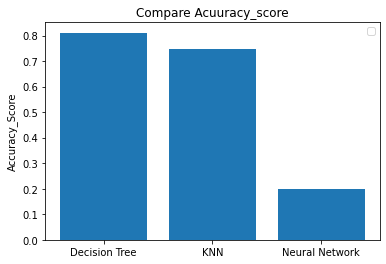

In [63]:
from matplotlib import pyplot as plt

labels = ['Decision Tree', 'KNN', 'Neural Network']
accuracy_Y = [acc_decision_tree,acc_KNN,acc_NN]
#plot
plt.bar(labels,accuracy_Y)
plt.ylabel('Accuracy_Score')
plt.title('Compare Acuuracy_score')
plt.legend();

#### เปรียบเทียบค่าเฉลี่ยค่าส่งของแต่ล่ะ category

In [69]:
#ดูชื่อคอลัมน์ทั้งหมด
set(data_droped.columns)

{'freight_value',
 'order_id',
 'order_item_id',
 'price',
 'product_category_name',
 'product_description_lenght',
 'product_height_cm',
 'product_id',
 'product_length_cm',
 'product_name_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_width_cm',
 'seller_city',
 'seller_id',
 'seller_state',
 'seller_zip_code_prefix',
 'shipping_limit_date'}

In [75]:
#ใช้ข้อมูล product_category_name จัดกลุ่ม แล้วหาค่าเฉลี่ยของ freight_value
category_mean = data_droped.groupby('product_category_name')[['freight_value']].mean().reset_index()
category_mean

,product_category_name,freight_value
0,agro_industria_e_comercio,27.564151
1,alimentos,14.256922
2,alimentos_bebidas,16.215791
3,artes,19.354880
4,artes_e_artesanato,15.422083
...,...,...
68,sinalizacao_e_seguranca,32.702613
69,tablets_impressao_imagem,14.773494
70,telefonia,15.669041
71,telefonia_fixa,17.567462


No handles with labels found to put in legend.


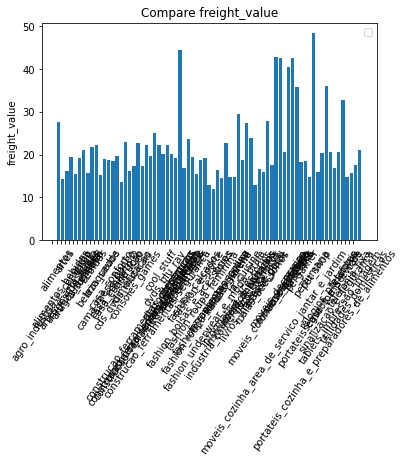

In [104]:
plt.bar(np.arange(len(category_mean.iloc[:,1])), category_mean.iloc[:,1])

plt.ylabel('freight_value')
plt.title('Compare freight_value')
plt.xticks(np.arange(len(category_mean.iloc[:,0]))-1.5, category_mean.iloc[:,0],rotation=55)
plt.legend();

ค่าส่งเแลี่ยเเกิน 25

In [107]:
change = category_mean['freight_value'] > 25
mean_over25 = category_mean[change]
mean_over25

,product_category_name,freight_value
0,agro_industria_e_comercio,27.564151
29,eletrodomesticos_2,44.538571
43,industria_comercio_e_negocios,29.420448
45,instrumentos_musicais,27.409544
50,malas_acessorios,27.880247
52,moveis_colchao_e_estofado,42.906842
53,moveis_cozinha_area_de_servico_jantar_e_jardim,42.702598
55,moveis_escritorio,40.551124
56,moveis_quarto,42.497523
57,moveis_sala,35.722008


No handles with labels found to put in legend.


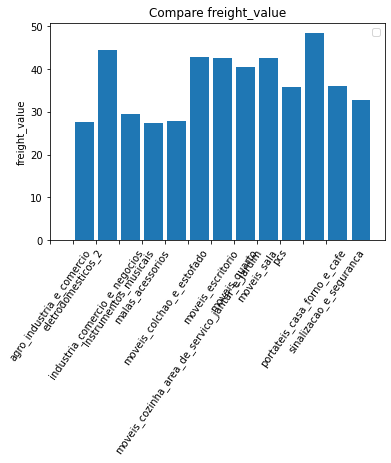

In [103]:
plt.bar(np.arange(len(mean_over100.iloc[:,1])), mean_over100.iloc[:,1])

plt.ylabel('freight_value')
plt.title('Compare freight_value')
plt.xticks(np.arange(len(mean_over100.iloc[:,0]))-1.5, mean_over100.iloc[:,0],rotation=55)
plt.legend();

ค่าส่งเฉลี่ยมากว่าหรือเท่ากับ 20 แต่น้อยกว่า 25

In [95]:
mean_btw20to25 = category_mean[(category_mean['freight_value'] >= 20) & (category_mean['freight_value'] <= 25)]
mean_btw20to25

,product_category_name,freight_value
6,artigos_de_natal,21.106536
8,automotivo,21.880569
9,bebes,22.299644
16,casa_construcao,22.901060
19,climatizacao,22.724680
21,construcao_ferramentas_construcao,22.228644
23,construcao_ferramentas_iluminacao,24.946711
24,construcao_ferramentas_jardim,22.316807
25,construcao_ferramentas_seguranca,20.201546
26,cool_stuff,22.138857


No handles with labels found to put in legend.


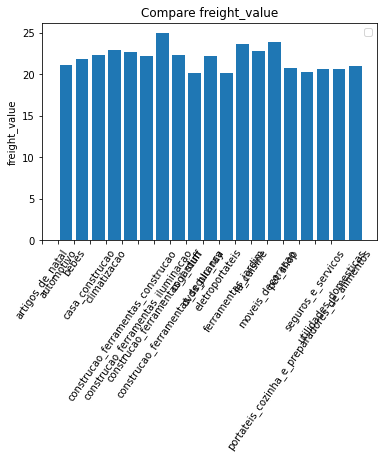

In [105]:
plt.bar(np.arange(len(mean_btw20to25.iloc[:,1])), mean_btw20to25.iloc[:,1])

plt.ylabel('freight_value')
plt.title('Compare freight_value')
plt.xticks(np.arange(len(mean_btw20to25.iloc[:,0]))-1.5, mean_btw20to25.iloc[:,0],rotation=55)
plt.legend();

ค่าส่งเฉลี่ย มากว่าหรือเท่ากับ 15 แต่น้อยกว่า 20

In [111]:
mean_btw15to20 = category_mean[(category_mean['freight_value'] >= 15) & (category_mean['freight_value'] < 20)]
mean_btw15to20

,product_category_name,freight_value
2,alimentos_bebidas,16.215791
3,artes,19.354880
4,artes_e_artesanato,15.422083
5,artigos_de_festas,19.255116
7,audio,15.688022
10,bebidas,15.148417
11,beleza_saude,18.879703
12,brinquedos,18.806400
13,cama_mesa_banho,18.415928
14,casa_conforto,19.588088


No handles with labels found to put in legend.


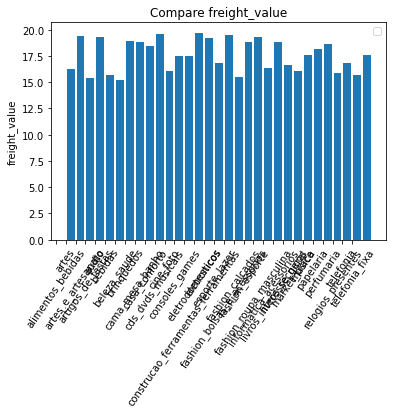

In [112]:
plt.bar(np.arange(len(mean_btw15to20.iloc[:,1])), mean_btw15to20.iloc[:,1])

plt.ylabel('freight_value')
plt.title('Compare freight_value')
plt.xticks(np.arange(len(mean_btw15to20.iloc[:,0]))-1.5, mean_btw15to20.iloc[:,0],rotation=55)
plt.legend();

ค่าส่งเฉลี่ยน้อยกว่า 15

In [110]:
change2 = category_mean['freight_value'] < 15
mean_under15 = category_mean[change2]
mean_under15

,product_category_name,freight_value
1,alimentos,14.256922
15,casa_conforto_2,13.677000
36,fashion_roupa_feminina,12.953125
37,fashion_roupa_infanto_juvenil,11.938750
39,fashion_underwear_e_moda_praia,14.627405
41,flores,14.814242
42,fraldas_higiene,14.709744
47,livros_importados,12.830833
60,pc_gamer,14.841111
69,tablets_impressao_imagem,14.773494


No handles with labels found to put in legend.


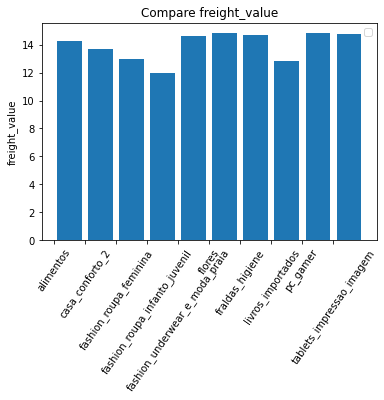

In [116]:
plt.bar(np.arange(len(mean_under15.iloc[:,1])), mean_under15.iloc[:,1])

plt.ylabel('freight_value')
plt.title('Compare freight_value')
plt.xticks(np.arange(len(mean_under15.iloc[:,0]))-0.5, mean_under15.iloc[:,0],rotation=55)
plt.legend();